In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import warnings

We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [4]:
air=pd.read_csv(r"C:\Users\Vithushan\Downloads\airlines_passengers.csv")

Let’s display the first five rows of data

In [5]:
air.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [6]:
air.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [7]:
air.dtypes

Month         object
Passengers     int64
dtype: object

The next thing we can do is convert the month column to an index. 


In [8]:
air["Month"]=pd.to_datetime(air["Month"])
air.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
air=air.set_index("Month")
air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

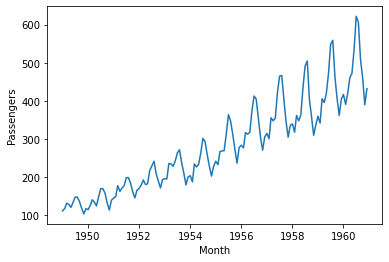

In [11]:
sns.lineplot(x="Month",y="Passengers", data=air)
plt.show()

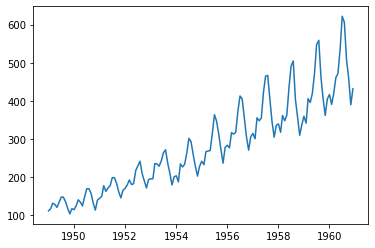

In [12]:
plt.plot(air)
plt.show()

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(air)

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [15]:
result = adfuller(air, autolag='AIC')
result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [16]:
result = adfuller(air, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060597
n_lags: 0.9918802434376411
p-value: 0.9918802434376411
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


Store our results in a dataframe display it

In [17]:
adfuller=pd.DataFrame(result)
adfuller

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.884041834..."
5,996.692931


In [18]:
adfuller_1={"ADF Statistic": 0.8153688792060597,"n_lags": 0.9918802434376411,"p-value": 0.9918802434376411,"Critial Values":
   "1%, -3.4816817173418295","Critial Values":"5%, -2.8840418343195267","Critial Values":
   "10%, -2.578770059171598"}

In [19]:
adfuller_2={"Statistics":["ADF Statistic","n_lags","p-value","Critial Values 1%","Critial Values 5%","Critial Values 10%"],"Values":[0.8153688792060597,0.9918802434376411,0.9918802434376411,-3.4816817173418295,-2.8840418343195267,-2.578770059171598]}

In [20]:
adfuller_df=pd.DataFrame(adfuller_2)
adfuller_df

,Statistics,Values
0,ADF Statistic,0.815369
1,n_lags,0.991880
2,p-value,0.991880
3,Critial Values 1%,-3.481682
4,Critial Values 5%,-2.884042
5,Critial Values 10%,-2.578770


Explain the results

In [21]:
'''
The value of the p parameter is equal to 0.99, which is high and for sure greater than 0.05 which means that I have to reject H0 hypothesis which stated that the data is stationary. 
The fact that the data is not stationary can be seen from the graph above, clearly the mean and the variance changes for diffrent time periods.
'''

'\nThe value of the p parameter is equal to 0.99, which is high and for sure greater than 0.05 which means that I have to reject H0 hypothesis which stated that the data is stationary. \nThe fact that the data is not stationary can be seen from the graph above, clearly the mean and the variance changes for diffrent time periods.\n'

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

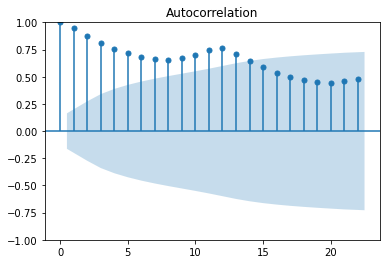

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(air)
plt.show()


Calculate partial autocorrelation

C:\Users\Vithushan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


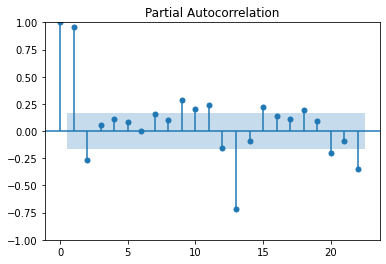

In [23]:

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(air)
plt.show()


Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


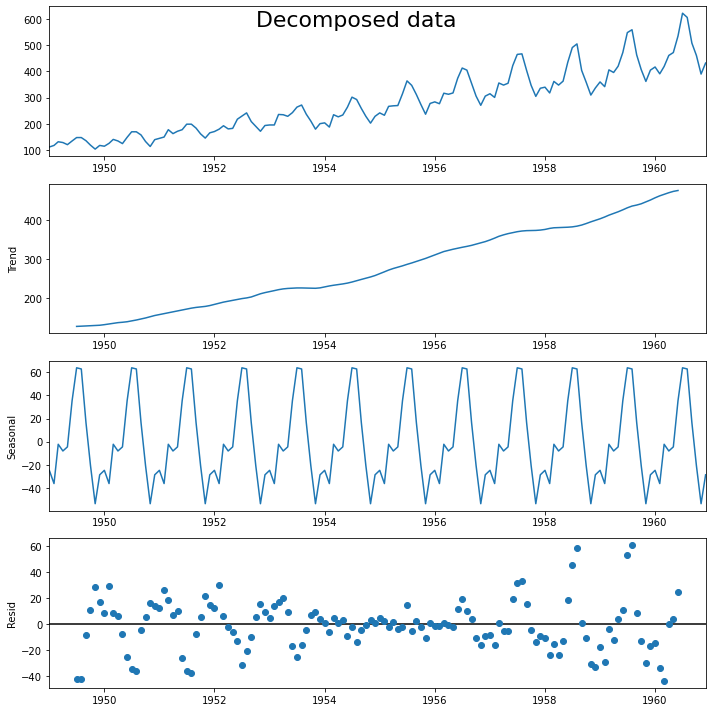

In [25]:
decompose = seasonal_decompose(air)


plt.rcParams.update({'figure.figsize': (10,10)})
decompose.plot().suptitle('Decomposed data', fontsize=22)

plt.show()


Can you describe the charts?


In [26]:
'''
In the first graph I see the original data so the time serires of passengers. 
In the next one I see the trend, so I can see that the number of passengers increases in time 
The third garph shows seasonality, so how data is repeated in time. 
FInally, the last graph is showing the residuals, so the noise that couldn't be inclouded in trend and seasonality
'''

"\nIn the first graph I see the original data so the time serires of passengers. \nIn the next one I see the trend, so I can see that the number of passengers increases in time \nThe third garph shows seasonality, so how data is repeated in time. \nFInally, the last graph is showing the residuals, so the noise that couldn't be inclouded in trend and seasonality\n"

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [33]:
air['Difference'] = air['Passengers'].diff()

In [34]:
air["Difference"].isna().sum()

1

In [35]:
air["Difference"]=air["Difference"].dropna()

In [36]:
air["Difference"].isna().sum()

1

MA(1)

In [37]:
result = adfuller(air)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

TypeError: 'DataFrame' object is not callable

Display the output

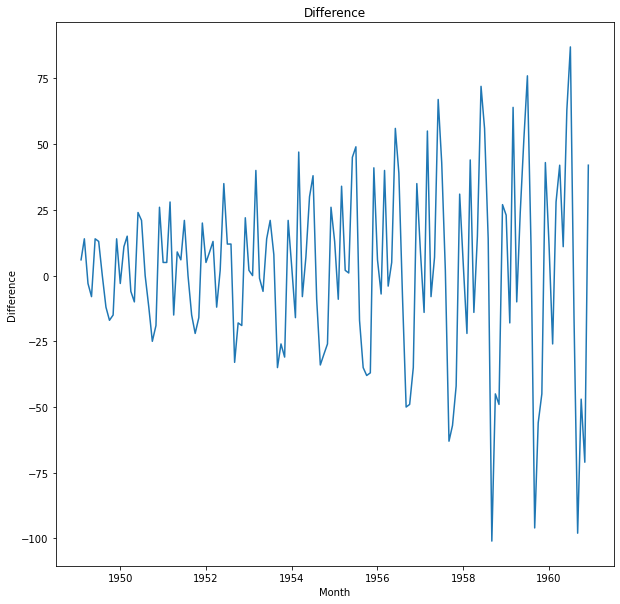

In [38]:
sns.lineplot(x=air.index, y=air.Difference)
plt.title('Difference')
plt.show()

MA(2)

In [39]:
from statsmodels.tsa.stattools import kpss

result = kpss(air.Difference.dropna())
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(0.023897614400183967, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 0.02
5% Critical Value: 0.46
p-value: 0.10


C:\Users\Vithushan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Display the output

In [40]:
import numpy as np
air['log'] = np.log(air.Passengers)
air['log'] = air['log'].diff()
air = air.drop(air.index[0])

AR(2)

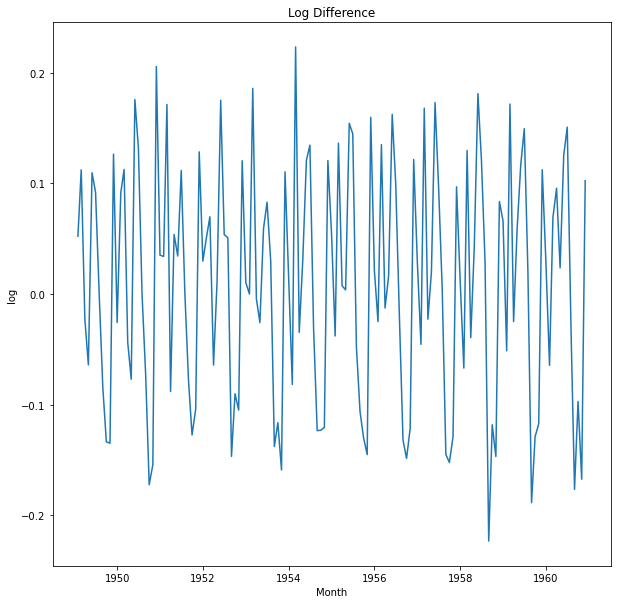

In [41]:
sns.lineplot(x=air.index, y=air.log)
plt.title('Log Difference')
plt.show()

In [42]:
air.head()

,Passengers,Difference,log
Month,,,
1949-02-01,118,6.0,0.052186
1949-03-01,132,14.0,0.112117
1949-04-01,129,-3.0,-0.022990
1949-05-01,121,-8.0,-0.064022
1949-06-01,135,14.0,0.109484


In [48]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(air, order=(0, 1))
res = mod.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


ARMA (?,?)

In [50]:
mod4 = ARMA(air)
res4 = mod4.fit()


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


Display the output

ARIMA(?,?)

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

Calculate AIC